## Class descriptions analysis

In this notebook I explore descriptions of classes offered by different Yoga studios in New York City.



---




Steps:
1. Data cleaning and inspection
2. Text data pre-processing
3. Text data basic descriptive analysis
4. Topic modeling


In [1]:
# access google drive folder
%cd /content/drive/MyDrive/Yoga_Classes

# running the files containing neccesary libraries and functions
%run 'notebooks/scripts/setup.ipynb'
%run 'notebooks/scripts/text_processing.ipynb'
%run 'notebooks/scripts/inspect_distributions.ipynb'
%run 'notebooks/scripts/topic_modeling.ipynb'

/content/drive/MyDrive/Yoga_Classes
/content/drive/MyDrive/Yoga_Classes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


/content/drive/MyDrive/Yoga_Classes
/content/drive/MyDrive/Yoga_Classes
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=d728398f4f6c8ae767945def13c77ca32cf430f3d17216bbec07cd2dc602c6b8
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


### Dataset description

In [2]:
# read the data
df_classes = pd.read_csv('data/yoga_classes.csv', dtype='string', usecols=['class_description'])

# drop the rows where no class description is provided for a class
df_classes = df_classes.dropna(subset=['class_description']).reset_index(drop=True)
df_classes.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,class_description
0,These classes use an aerial silk to create pos...
1,Relax your mind and align your body with aeria...
2,Aerial Yoga (Open Level) - this class is for e...
3,Ashtanga Yoga involves synchronization between...
4,Ashtanga Yoga is a systematic Vinyasa-style cl...


In [3]:
df_classes.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,class_description
count,464
unique,463
top,In this gentle class you will truly learn what...
freq,2


* `class_description` - Description of the class. The column has 463 unique values (descriptions) out of 464 total. Two class descriptions for Nidra and Restorative practice class by Sury Aside studio are identical; I decided to keep them as there are different classes as defined by the studio.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The shortest Class Description has 10 words in total
The longest Class Description has 755 words in total
The mean Class Description length is 73 words
The median Class Description length is 59 words


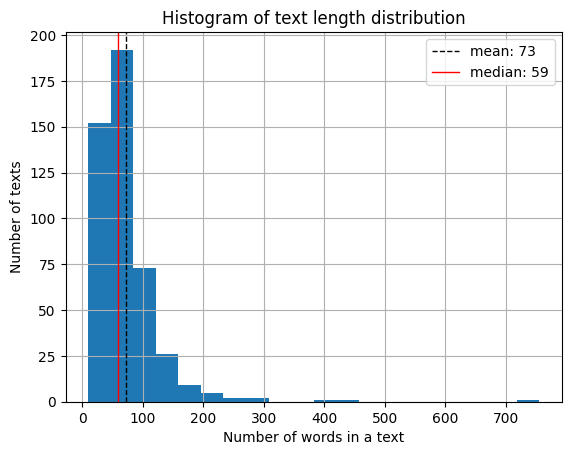

In [4]:
# Word count
df_classes['word_count']= df_classes['class_description'].apply(lambda x: len(x.strip().split()))

# Unique word count
df_classes['unique_word_count'] = df_classes['class_description'].apply(lambda x: len(set(str(x).split())))

word_count(df_classes['word_count'], "Histogram of text length distribution", "Number of words in a text", "Number of texts", 'Class Description')

In [5]:
df_classes.drop(columns=['word_count', 'unique_word_count'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Text data pre-processing

Load and prepare stopwords sets

In [6]:
stop_words_styles_df = pd.read_csv('data/stopwords.csv', usecols=['yoga_related'])
stop_words_styles = set(stop_words_styles_df['yoga_related'])
stop_words_general_df = pd.read_csv('data/stopwords.csv', usecols=['org_details', 'irr_verbs', 'city_name', 'common_words', 'other'])
stop_words_general = set(stop_words_general_df.values.ravel().tolist())

stop_set_no_styles = stop_words.union(stop_words_general)
stop_set_with_styles = stop_set_no_styles.union(stop_words_styles)

cleaned_text_with_styles = preprocess_text(df_classes["class_description"], stop_set=stop_set_no_styles)
cleaned_text_no_styles = preprocess_text(df_classes["class_description"], stop_set=stop_set_with_styles)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Normalize texts

In [7]:
df_classes["cleaned_text_with_styles"] = cleaned_text_with_styles
df_classes["cleaned_text_no_styles"] = cleaned_text_no_styles

df_classes.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,class_description,cleaned_text_with_styles,cleaned_text_no_styles
0,These classes use an aerial silk to create pos...,use aerial silk create less gravitational pull...,use silk create less gravitational pull body c...
1,Relax your mind and align your body with aeria...,relax mind align body aerial yoga gently guide...,relax mind align body gently guide elevate ins...
2,Aerial Yoga (Open Level) - this class is for e...,aerial yoga exist yoga practitioners aerial ex...,exist practitioners experience require best ma...


In [8]:
print('Text before pre-processing:')
print(df_classes['class_description'].iloc[-3])
print()
print('Text after pre-processing (without yoga words):')
print(df_classes['cleaned_text_no_styles'].iloc[-3])
print()
print('Text after pre-processing (with yoga words):')
print(df_classes['cleaned_text_with_styles'].iloc[-3])
print()

Text before pre-processing:
After a long week, what could be better than a deliciously relaxing yoga sesh followed by a tasty glass of vino? It’s the perfect pairing. To start, we'll get centered and release frenetic energy with gentle movement set to a soundscape of relaxing vibes. Then we’ll take it down a notch more, winding down with some grounding seated postures. Finally, we’ll melt layers of deeply held tension, supported by bolsters, blankets, and blocks, in restorative postures that bring bliss to our urban souls! Before floating home (or wherever your weekend plans take you), you're invited to hang for a bit... Mix and mingle with the tribe, enjoying a glass of wine on the house. Here's to your health and happiness!

Text after pre-processing (without yoga words):
long week could better deliciously relax sesh follow tasty glass vino perfect pair center release frenetic energy gentle soundscape relax vibes notch wind ground seat finally melt layer deeply hold tension support b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Text data basic descriptive analysis

WORDCLOUD

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



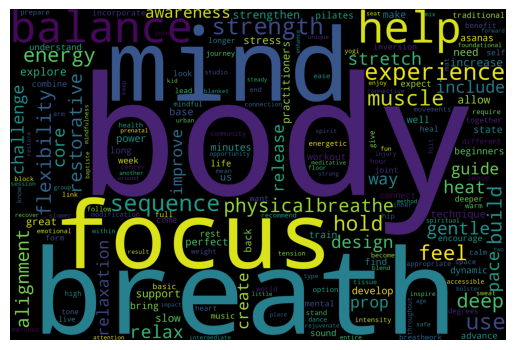

In [9]:
text = " ".join(var for var in df_classes["cleaned_text_no_styles"])
create_word_cloud(text)

Word cloud by styles

In [10]:
# class_styles_list = df_classes['class_style'].unique()

# get_style_word_clouds(df_classes, class_styles_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NGRAMS

In [11]:
df_unigrams = get_top_n_words(df_classes["cleaned_text_no_styles"], 15)
plot_ngrams_distribution(df_unigrams, 'unigram')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<figure>
<center>
<img src='https://drive.google.com/uc?id=1oykWYpx7RlOELrH_kkJsIm1PTZYNnQhk'/>
</center>
</figure>


In [12]:
df_bigrams = get_top_n_bigram(df_classes["cleaned_text_no_styles"], 15)
plot_ngrams_distribution(df_bigrams, 'bigram')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




<figure>
<center>
<img src='https://drive.google.com/uc?id=1trz_G32D7gXBS-hJpFywwBCF6tibxL-m'/>
</center>
</figure>


### Topic modeling

In [13]:
# set seed
np.random.seed(222)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [14]:
text_var = df_classes['cleaned_text_no_styles']
texts, id2word, corpus = prepare_lda_inputs(text_var, no_below=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Find the best number of topics with elbow method

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Best coherence value of 0.40302575816695374 was reached for the LDA model with 5 topics
Index of the corresponding model: 3


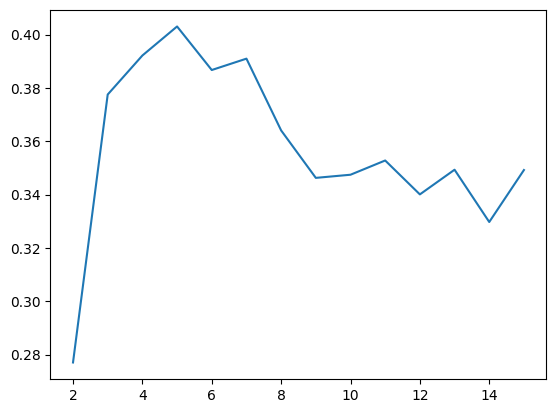

In [15]:
start=2; limit=16; step=1

model_list, coherence_model_list, coherence_values = compare_lda_coherence(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

In [16]:
lda_model = model_list[3]
topics = lda_model.show_topics(formatted=False, num_topics=5, num_words=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [17]:
LDAvis_prepared = get_lda_distance_map(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.211415 -0.129549       1        1  25.396217
2     -0.158421  0.059386       2        1  24.738615
3     -0.123135 -0.061838       3        1  18.828279
0     -0.038273 -0.101382       4        1  18.003915
1      0.108413  0.233383       5        1  13.032974, topic_info=           Term        Freq       Total Category  logprob  loglift
66       muscle   84.000000   84.000000  Default  30.0000  30.0000
52      breathe   64.000000   64.000000  Default  29.0000  29.0000
35      stretch   82.000000   82.000000  Default  28.0000  28.0000
2    experience  112.000000  112.000000  Default  27.0000  27.0000
165      gentle   79.000000   79.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
89      include   21.062382   68.304771   Topic5  -3.7738   0.8612
28         mind   27.351515  126.701810   Topic5  -3.5125   0.5046
82      explore   16.469322   53.274725   Topic5  -4.0198   0.8637
60        focus   14.541511  107.861373   Topic5  -4.1442   0.0338
7       balance   14.368105  118.834565   Topic5  -4.1562  -0.0750

[240 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
128       1  0.103171        1
128       3  0.257928        1
128       4  0.619027        1
129       1  0.489616        2
129       3  0.030601        2
...     ...       ...      ...
116       4  0.148723     well
116       5  0.520529     well
140       1  0.199513   within
140       4  0.748174   within
109       1  0.980107  workout

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 1, 2])

In [18]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topics detection and description:

1. Topic 1. Coherence - 0.43. Tokens - 18%. **Balance and Alignment**.
It is the fourth biggest topic. It is close to the third one both in terms of distance and the size. These practices focus on finding BALANCE, it is both about body and mind. It is ALIGNMENT. Such words as INVERSIONS, ARM, SEQUENCE let us think that those are advanced traditional practices focusing on full body core improvement and inner peace and balance.

2. Topic 2. Coherence - 0.33. Tokens - 13%. **Stress Relief/Breath Techniques**.
The fifth biggest topic is the farthest from all the others on the Intertopic Distance Map. It also has the smallest topic coherence and size. These practices seem to be intended for STRESS relief and involve more mind and breath practices rather that body.

3. Topic 3. Coherence - 0.38. Tokens - 24.7%. **Deep Relaxation/Mind Practice**
It is the second biggest topic, of almost the same N of tokens as the 1st one. These classes are about deep relaxation, mind and breath involving. Physical is not relevant

4. Topic 4. Coherence - 0.37. Tokens - 18.8%. **Stretch and Release.**
These practices primarily focus on stretching. They seem to be aimed to gentle release and involve breathing practices.

5. Topic 5. Coherence - 0.51. Tokens - 25.4%. Core and Strength.
It is the biggest topic in the dataset. These classes clearly focus on physical strength of body. Aimed to MUSCLE, STRENGTH, CORE improvement.


The topics coherence and the size are correlated. The bigger the size, the bigger the coherence.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



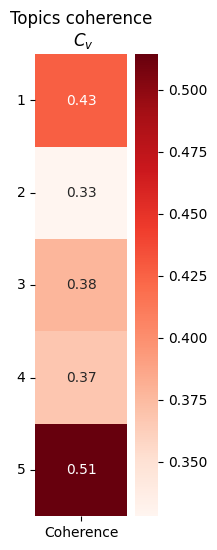

In [19]:
coherence_model_lda = coherence_model_list[3]
plot_topics_coherence_lda(coherence_model_lda)

### Save data features


Prepare dataset for network analysis step

In [20]:
# select words with probability of occurence within each topic >= 0.01: for Network 1

top_words_per_topic = [(topic[0], [i for i in topic[1] if i[1] >= 0.01]) for topic in lda_model.show_topics(formatted=False, num_topics=5, num_words=100)]
top_words_per_topic = [[w for w in t[1]] for t in top_words_per_topic]

# to dataframe
df_topic_keywords = pd.DataFrame(top_words_per_topic)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

topics_names = ['Balance and Alignment','Stress Relief/Breath Techniques','Deep Relaxation/Mind Practice','Stretch and Release','Core and Strength']
df_topic_keywords['topic_theme'] = topics_names

df_topic_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 34,Word 35,Word 36,Word 37,Word 38,Word 39,Word 40,Word 41,Word 42,topic_theme
Topic 0,"(balance, 0.046918686)","(experience, 0.0400653)","(pace, 0.032944515)","(expect, 0.029195547)","(practitioners, 0.026495256)","(advance, 0.025884261)","(design, 0.023716308)","(alignment, 0.023432797)","(inversions, 0.023160363)","(heat, 0.02258218)",...,"(strong, 0.011054984)","(invigorate, 0.010218614)","(mix, 0.010045802)",None,None,None,None,None,None,Balance and Alignment
Topic 1,"(breathe, 0.050553776)","(experience, 0.044586655)","(help, 0.036087126)","(techniques, 0.034341395)","(stress, 0.031036934)","(safe, 0.030042244)","(mind, 0.02982293)","(find, 0.02921227)","(make, 0.0264235)","(physical, 0.025297947)",...,"(back, 0.01109406)","(journey, 0.011027078)","(result, 0.010706896)","(gentle, 0.010645721)","(accessible, 0.010088943)","(two, 0.010036967)",None,None,None,Stress Relief/Breath Techniques
Topic 2,"(deep, 0.033311885)","(mind, 0.03258455)","(relax, 0.029688084)","(breath, 0.029414568)","(restorative, 0.026617585)","(guide, 0.022877079)","(perfect, 0.022086388)","(allow, 0.022061208)","(relaxation, 0.02136961)","(slow, 0.020773262)",...,"(know, 0.011261524)","(end, 0.011242435)","(awareness, 0.0111066615)","(combine, 0.011028186)","(way, 0.010874372)","(restore, 0.010556864)","(rejuvenate, 0.010138574)","(dynamic, 0.010121598)","(bring, 0.010018758)",Deep Relaxation/Mind Practice
Topic 3,"(stretch, 0.04796699)","(gentle, 0.04410061)","(release, 0.036043968)","(breath, 0.03367957)","(prop, 0.031269006)","(hold, 0.031211577)","(focus, 0.028890774)","(use, 0.022997575)","(alignment, 0.021473944)","(challenge, 0.02078411)",...,None,None,None,None,None,None,None,None,None,Stretch and Release
Topic 4,"(muscle, 0.046712667)","(strength, 0.04260337)","(core, 0.02775268)","(improve, 0.026780404)","(use, 0.025773464)","(build, 0.021930913)","(balance, 0.02182767)","(workout, 0.021816202)","(help, 0.02149756)","(train, 0.021372743)",...,None,None,None,None,None,None,None,None,None,Core and Strength


In [21]:
# save the dataset to csv to enable further inspection
df_topic_keywords.to_csv('data/df_topic_keywords.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Align texts with topics and their probabilities

In [22]:
# extract probabilities
probabilities=[lda_model.get_document_topics(item, minimum_probability=0.0) for item in corpus]
topics_prob = [[tupple[1] for tupple in tlist] for tlist in probabilities]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
docnames = ["Doc" + str(i) for i in range(len(df_classes))]
df_document_topic = pd.DataFrame(topics_prob, columns=topics_names, index=docnames)

# get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [24]:
# merge alignment with main dataframe

df_document_topic.reset_index(inplace=True)
df_classes_topics= pd.merge(df_classes, df_document_topic, left_index=True, right_index=True)
df_classes_topics.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [25]:
# match topic number with topic name

def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'Balance and Alignment'
    if row['dominant_topic'] == 1 :
        return 'Stress Relief/Breath Techniques'
    if row['dominant_topic'] == 2 :
        return 'Deep Relaxation/Mind Practice'
    if row['dominant_topic'] == 3 :
        return 'Stretch and Release'
    if row['dominant_topic'] == 4 :
        return 'Core and Strength'

df_classes_topics['dominant_topic_theme'] = df_classes_topics.apply(lambda row: label_theme(row), axis=1)
df_classes_topics.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,class_description,cleaned_text_with_styles,cleaned_text_no_styles,Balance and Alignment,Stress Relief/Breath Techniques,Deep Relaxation/Mind Practice,Stretch and Release,Core and Strength,dominant_topic,dominant_topic_theme
0,These classes use an aerial silk to create pos...,use aerial silk create less gravitational pull...,use silk create less gravitational pull body c...,0.029489,0.182031,0.028965,0.029540,0.729975,4,Core and Strength
1,Relax your mind and align your body with aeria...,relax mind align body aerial yoga gently guide...,relax mind align body gently guide elevate ins...,0.120759,0.003898,0.393930,0.003922,0.477491,4,Core and Strength
2,Aerial Yoga (Open Level) - this class is for e...,aerial yoga exist yoga practitioners aerial ex...,exist practitioners experience require best ma...,0.673739,0.239994,0.028621,0.028928,0.028717,0,Balance and Alignment


In [26]:
# save the dataset to csv to enable further inspection
df_classes_topics.to_csv('data/df_with_topics.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

